Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_context("talk")

Reading csv file

In [2]:
df = pd.read_csv("audi.csv")

Displaying the data set

In [3]:
display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4


Displaying the relative frequenies under 'model' column

In [4]:
model_count = df['model'].value_counts(normalize=True)
display(model_count)

 A3     0.180821
 Q3     0.132827
 A4     0.129453
 A1     0.126265
 A5     0.082677
 Q5     0.082208
 Q2     0.077053
 A6     0.070116
 Q7     0.037214
 TT     0.031496
 A7     0.011436
 A8     0.011061
 Q8     0.006468
 RS6    0.003656
 RS3    0.003093
 RS4    0.002906
 RS5    0.002718
 R8     0.002625
 S3     0.001687
 SQ5    0.001500
 S4     0.001125
 SQ7    0.000750
 S8     0.000375
 S5     0.000281
 A2     0.000094
 RS7    0.000094
Name: model, dtype: float64

In [5]:
model_count = df['model'].value_counts(normalize=True)
model_count = pd.DataFrame(model_count)
display(model_count)

,model
A3,0.180821
Q3,0.132827
A4,0.129453
A1,0.126265
A5,0.082677
Q5,0.082208
Q2,0.077053
A6,0.070116
Q7,0.037214
TT,0.031496


In [6]:
model_count = df['model'].value_counts(normalize=True)
model_count = pd.DataFrame(model_count)
model_count = model_count.reset_index()
display(model_count)

,index,model
0,A3,0.180821
1,Q3,0.132827
2,A4,0.129453
3,A1,0.126265
4,A5,0.082677
5,Q5,0.082208
6,Q2,0.077053
7,A6,0.070116
8,Q7,0.037214
9,TT,0.031496


Displaying the percentage of cars for each 'model'

In [7]:
model_count = df['model'].value_counts(normalize=True)
model_count = pd.DataFrame(model_count)
model_count = model_count.reset_index()
model_count = model_count.rename(columns={'index':'model','model':'% of cars'})
model_count['% of cars'] = model_count['% of cars']*100
model_count['% of cars'] = np.round(model_count['% of cars'],2)
display(model_count)

,model,% of cars
0,A3,18.08
1,Q3,13.28
2,A4,12.95
3,A1,12.63
4,A5,8.27
5,Q5,8.22
6,Q2,7.71
7,A6,7.01
8,Q7,3.72
9,TT,3.15


Showing the percentage of cars for each 'model' in the form of a barplot

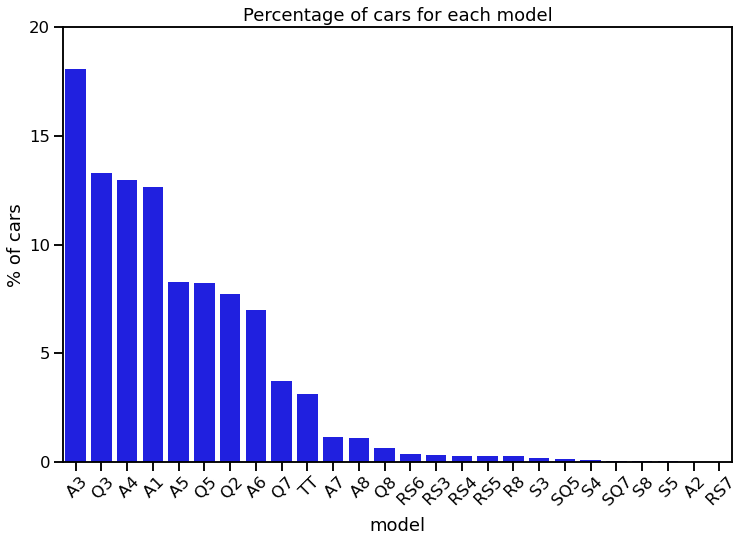

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x='model',y='% of cars',data=model_count, color='blue')
plt.title('Percentage of cars for each model')
plt.yticks(np.arange(0,21,5))
plt.xticks(rotation=45)
plt.show()

Defining a function to figure out the percentage of cars for other categories

In [9]:
def percent_cars_count(data, col):
    
    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns={'index':col,col:'% of cars'})
    col_count['% of cars'] = col_count['% of cars']*100
    col_count['% of cars'] = np.round(col_count['% of cars'],2)
    
    return col_count

Displaying the percentage of cars for each 'model' (using the function)

In [10]:
model_count = percent_cars_count(df,'model')
display(model_count)

,model,% of cars
0,A3,18.08
1,Q3,13.28
2,A4,12.95
3,A1,12.63
4,A5,8.27
5,Q5,8.22
6,Q2,7.71
7,A6,7.01
8,Q7,3.72
9,TT,3.15


Displaying the percentage of cars for each 'year' (using the function)

In [11]:
year_count = percent_cars_count(df,'year')
display(year_count)

,year,% of cars
0,2019,29.97
1,2016,18.41
2,2017,18.14
3,2015,9.36
4,2018,8.10
5,2020,6.71
6,2014,4.19
7,2013,2.73
8,2012,0.80
9,2011,0.44


Displaying the percentage of cars for each 'transmission' (using the function)

In [12]:
transmission_count = percent_cars_count(df,'transmission')
display(transmission_count)

,transmission,% of cars
0,Manual,40.95
1,Semi-Auto,33.66
2,Automatic,25.38


Displaying the percentage of cars for each 'fuelType' (using the function)

In [13]:
fuelType_count = percent_cars_count(df,'fuelType')
display(fuelType_count)

,fuelType,% of cars
0,Diesel,52.28
1,Petrol,47.46
2,Hybrid,0.26


Defining a function to show the percentage of cars for other categories in the form of a barplot

In [14]:
def barplot(data, x_col, y_col, color, yticks, rotation):
    
    sns.barplot(x=x_col,y=y_col,data=data, color=color)
    plt.title('Percantage of cars for each ' + x_col)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)

Displaying the percentage of cars for the categories altogehter in a single frame

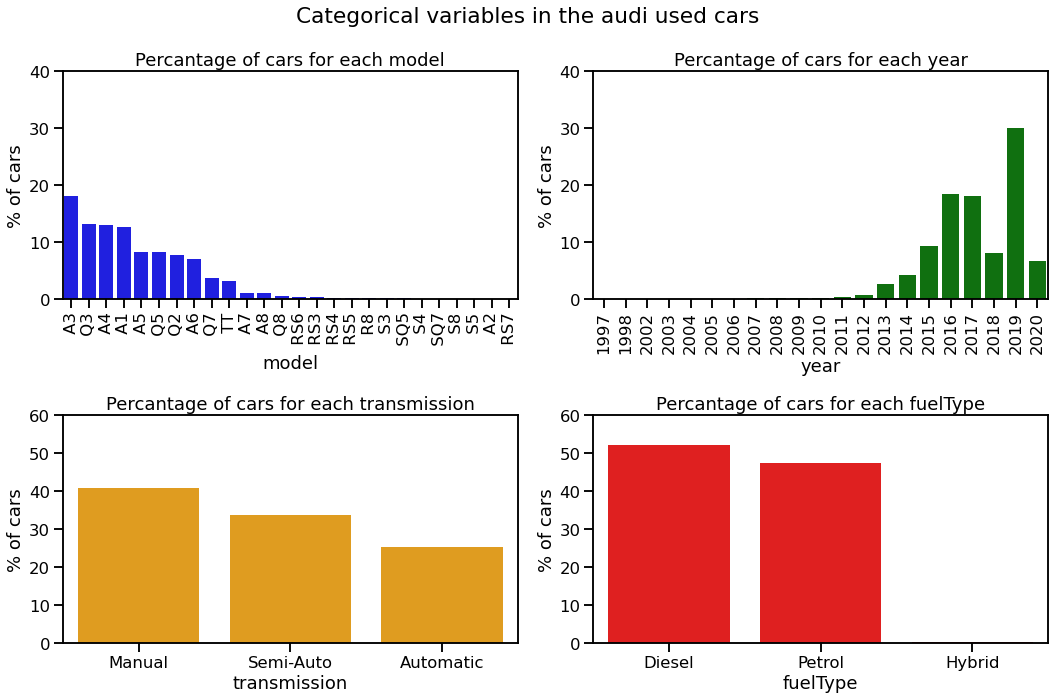

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
barplot(model_count, 'model', '% of cars', 'blue', np.arange(0,41,10), 90)

plt.subplot(2,2,2)
barplot(year_count, 'year', '% of cars', 'green', np.arange(0,41,10), 90)

plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', '% of cars', 'orange', np.arange(0,61,10), 0)

plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', '% of cars', 'red', np.arange(0,61,10), 0)

plt.suptitle("Categorical variables in the audi used cars")

plt.tight_layout()
plt.show()


Defining a function to show the price of cars for the continuous categories in the form of a scatterplot

In [16]:
def scatterplot(x_col,color):
    
    sns.scatterplot(x=x_col,y='price',data=df,color=color,hue='transmission')
    plt.title('Scatterplot of price of cars for each ' + x_col)

Displaying the scatterplot for price of cars with respect to the categories altogther in a single frame

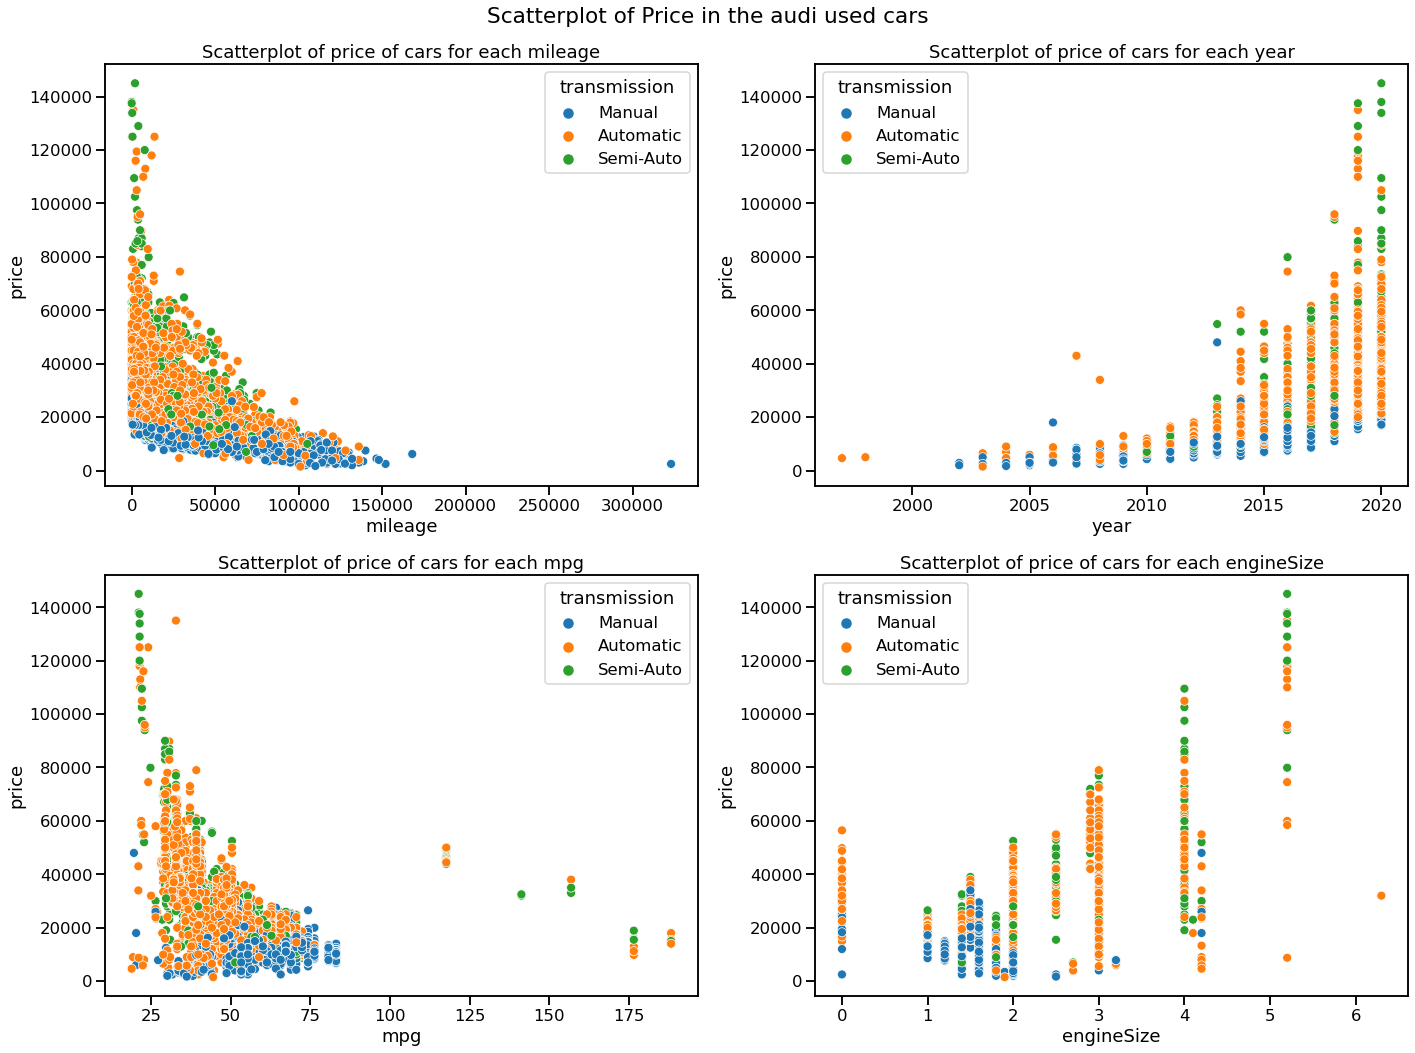

In [17]:
sns.set_context("talk")

plt.figure(figsize=(20,15))


plt.subplot(2,2,1)
scatterplot('mileage','blue')

plt.subplot(2,2,2)
scatterplot('year','green')


plt.subplot(2,2,3)
scatterplot('mpg','orange')


plt.subplot(2,2,4)
scatterplot('engineSize','red')

plt.suptitle("Scatterplot of Price in the audi used cars")

plt.tight_layout()
plt.show()

Defining a function to show the price of cars for the continuous categories in the form of a regressionplot

In [18]:
def regplot(x_col,color):
    
    sns.regplot(x=x_col,y='price',data=df,color=color, line_kws={'color':'black'},scatter_kws={'edgecolor':'white'})
    plt.ylim(0, 160000)
    plt.title('Regressionplot for price of cars for each ' + x_col)

Displaying the scatterplot for price of cars with respect to the categories altogther in a single frame

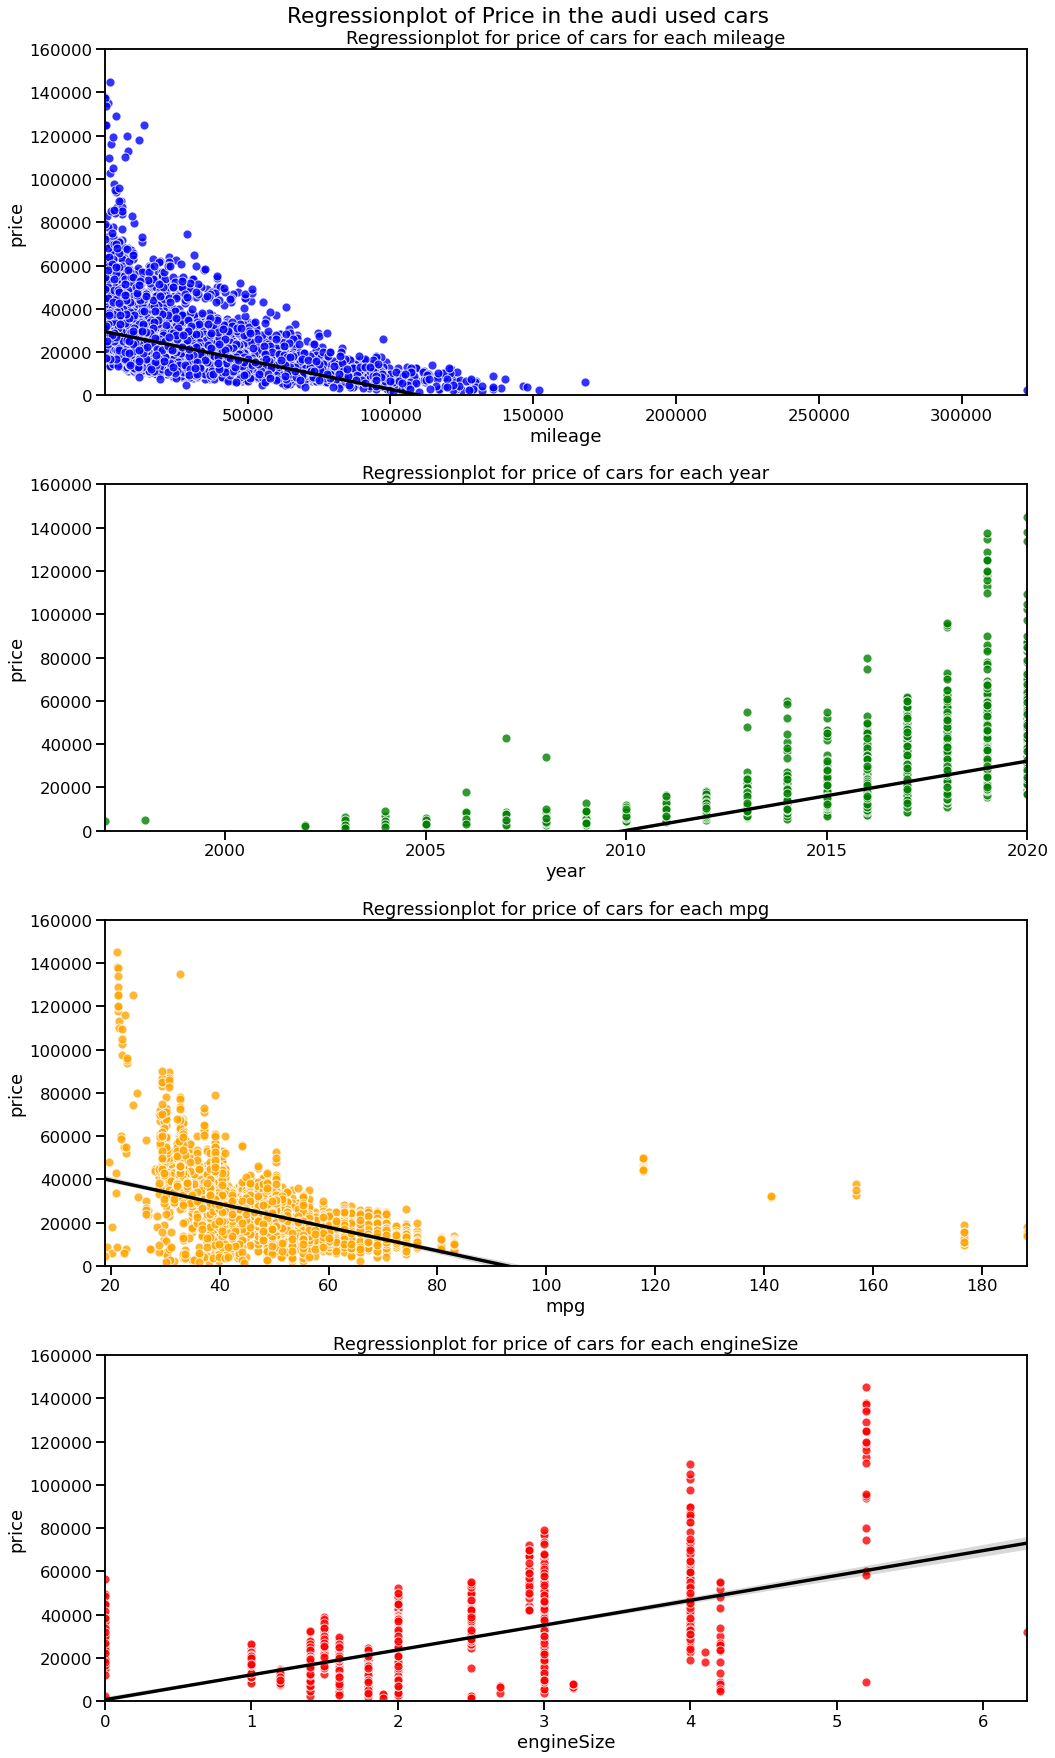

In [19]:
sns.set_context("talk")

plt.figure(figsize=(15,25))


plt.subplot(4,1,1)
regplot('mileage','blue')

plt.subplot(4,1,2)
regplot('year','green')


plt.subplot(4,1,3)
regplot('mpg','orange')


plt.subplot(4,1,4)
regplot('engineSize','red')

plt.suptitle("Regressionplot of Price in the audi used cars")

plt.tight_layout()
plt.show()

Defining a function to show the continuous categories in the form of a histogram

In [20]:
def histplot(x_col,color, binwidth):
    
    sns.histplot(x=x_col,data=df,color=color, binwidth=binwidth)
    plt.title('Histogram for ' + x_col + ' of cars')

Displaying histogram of the categories altogther in a single frame

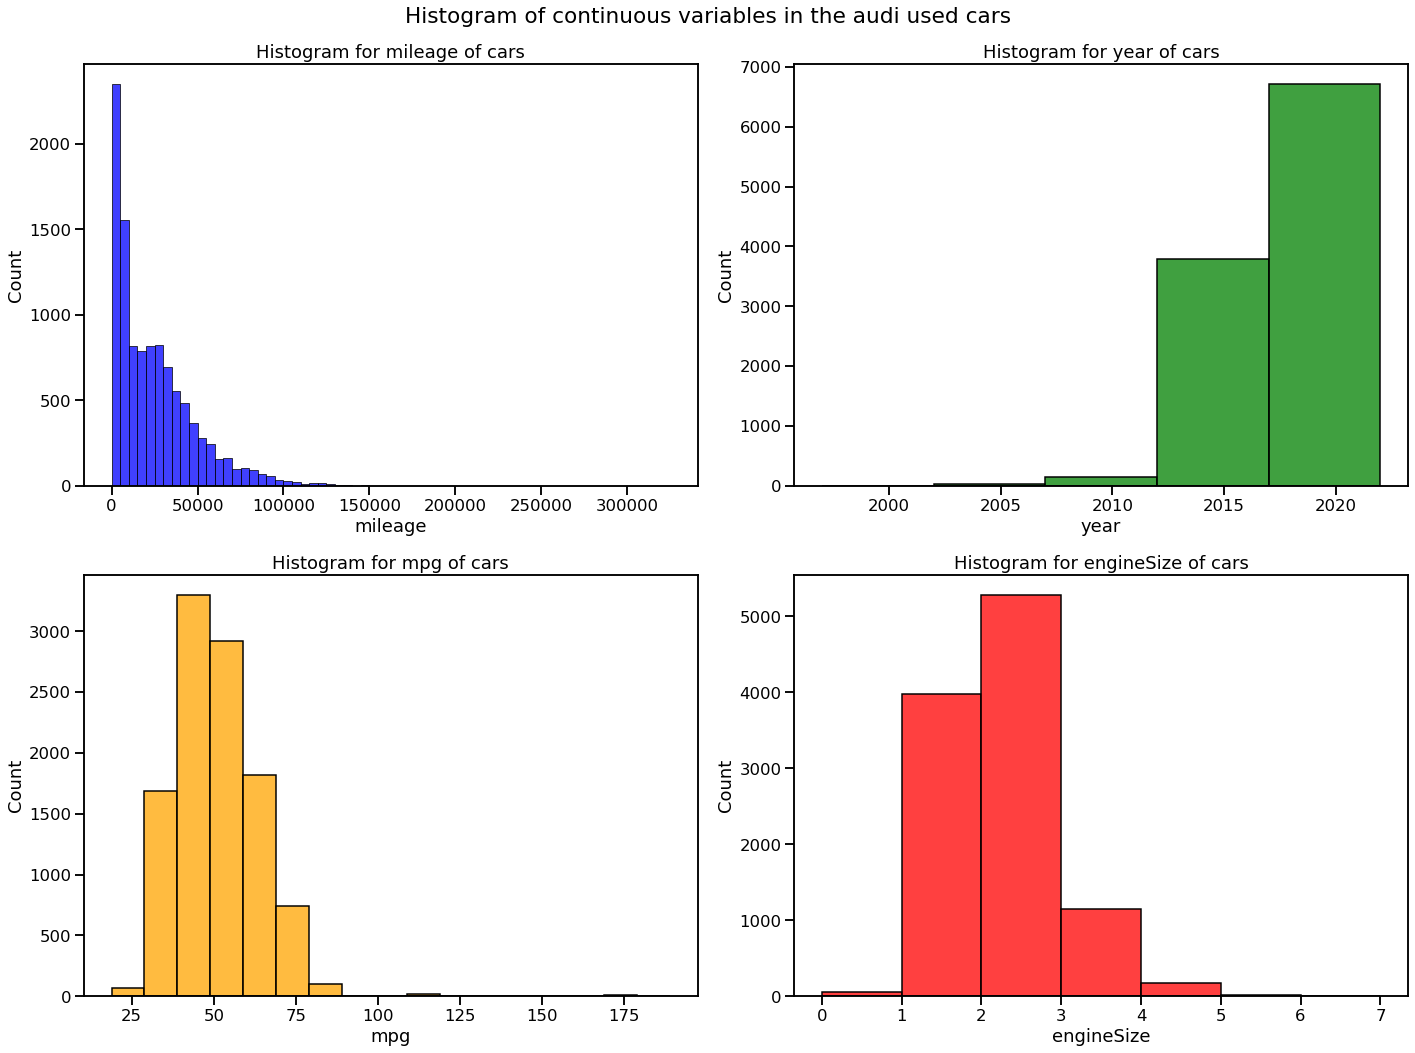

In [21]:
sns.set_context("talk")

plt.figure(figsize=(20,15))


plt.subplot(2,2,1)
histplot('mileage','blue',5000)

plt.subplot(2,2,2)
histplot('year','green',5)

plt.subplot(2,2,3)
histplot('mpg','orange',10)


plt.subplot(2,2,4)
histplot('engineSize','red',1)

plt.suptitle("Histogram of continuous variables in the audi used cars")

plt.tight_layout()
plt.show()

Defining a function to show the mileage and mpg in the form of a distibution plot

In [22]:
def histplot(x_col,color,binwidth):
    
    sns.histplot(x=x_col,data=df,color=color, binwidth=binwidth, kde=True)
    plt.title('Distribution plot for ' + x_col + ' of cars')

Displaying Distribution plot of mileage and mpg in a single frame

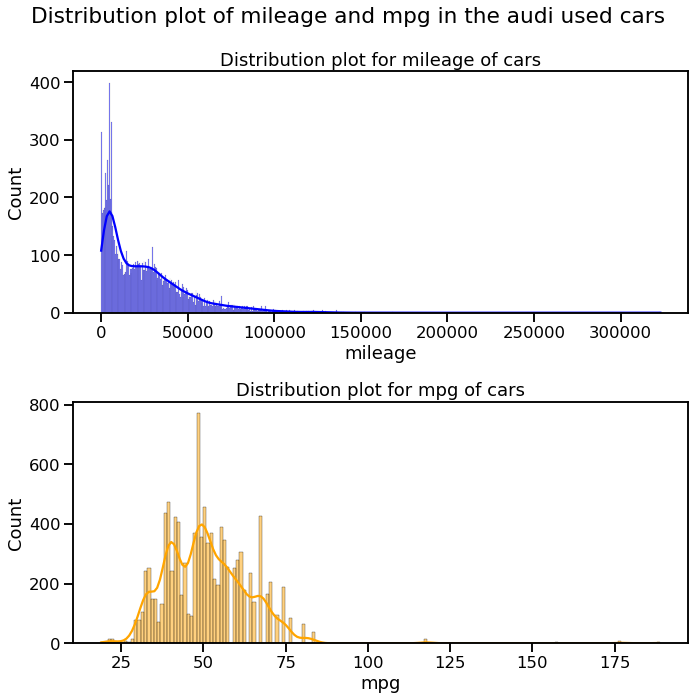

In [23]:
sns.set_context("talk")

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
histplot('mileage','blue', 500)

plt.subplot(2,1,2)
histplot('mpg','orange', 1)

plt.suptitle("Distribution plot of mileage and mpg in the audi used cars")


plt.tight_layout()
plt.show()

Defining a function to show the mileage and mpg in the form of a ECDF plot

In [24]:
def histplot(x_col,color,binwidth):
    
    sns.histplot(x=x_col,data=df,color=color, binwidth=binwidth,cumulative=True,stat='probability')
    plt.title('ECDF plot for ' + x_col + ' of cars')

Displaying ECDF plot of mileage and mpg in a single frame

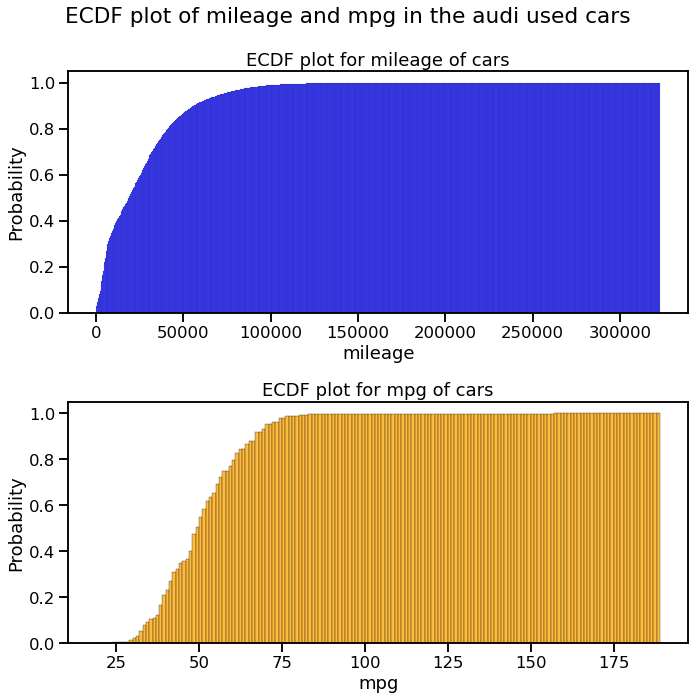

In [25]:
sns.set_context("talk")

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
histplot('mileage','blue', 500)

plt.subplot(2,1,2)
histplot('mpg','orange', 1)

plt.suptitle("ECDF plot of mileage and mpg in the audi used cars")

plt.tight_layout()
plt.show()

Defining a function to show the mileage and mpg against transmission in the form of a boxplot

In [26]:
def boxplot(x_col, y_col, color):
    
    sns.boxplot(x=x_col, y=y_col, data=df,color=color, showfliers=False)
    plt.title('Boxplot for ' + y_col + ' of cars against ' + x_col)

Displaying boxplot of mileage and mpg against trasnmission in a single frame

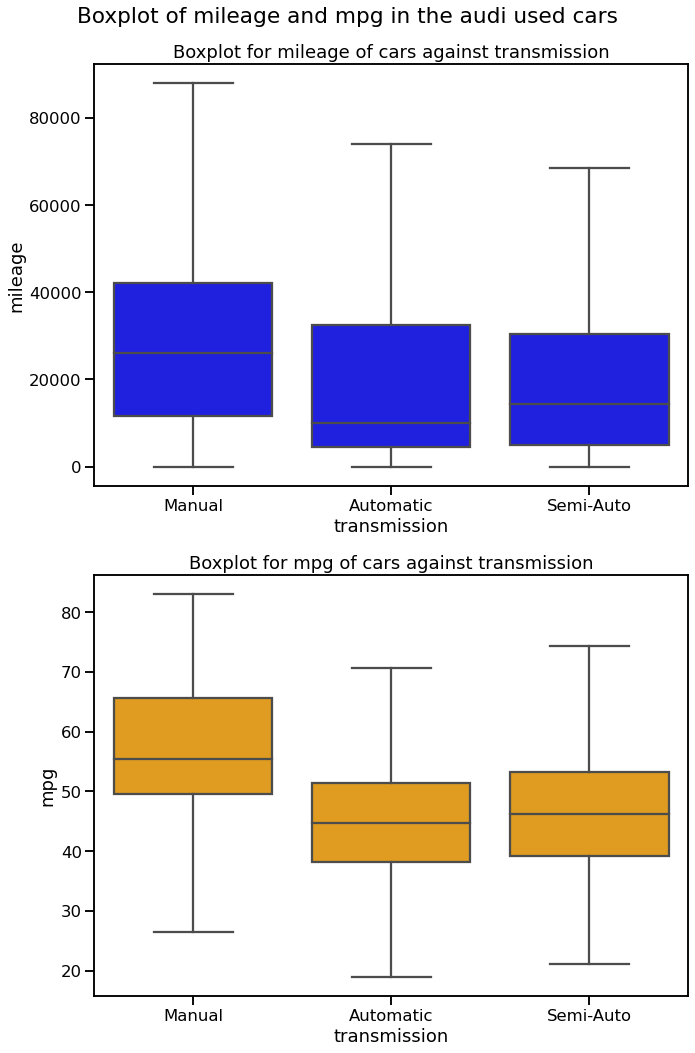

In [27]:
sns.set_context("talk")

plt.figure(figsize=(10,15))

plt.subplot(2,1,1)
boxplot('transmission','mileage','blue')

plt.subplot(2,1,2)
boxplot('transmission','mpg','orange')

plt.suptitle("Boxplot of mileage and mpg in the audi used cars")

plt.tight_layout()
plt.show()

**Data Aggregation [Based on Model]**

In [28]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


In [29]:
# sorting the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# creating a new column for percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# removing the 'count' column from the dataframe
df_agg = df_agg.drop('count', axis=1)

# converting the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding off the dataframe to two decimal points
df_agg = df_agg.round(2)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


**Barplot of the Audi used cars: Percentage of cars, Average and Total selling price of cars based on model**

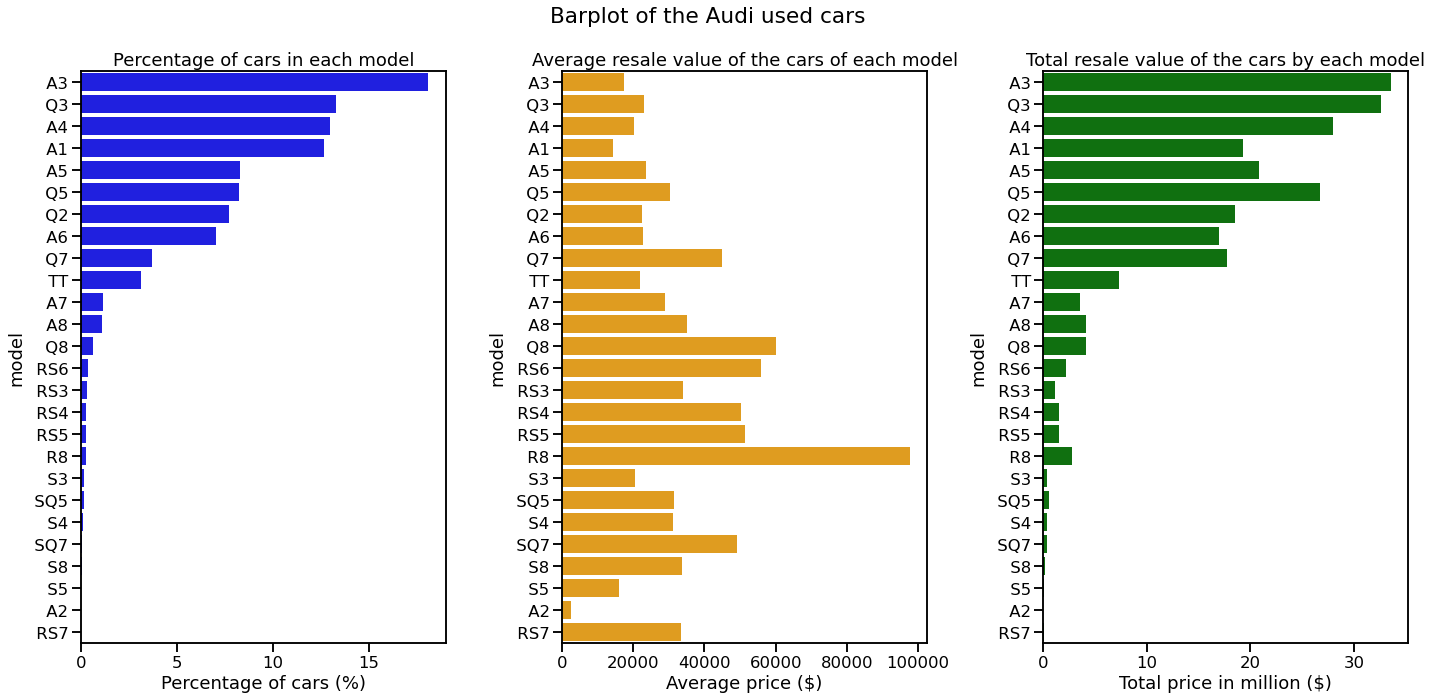

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million ($)")

plt.suptitle("Barplot of the Audi used cars")
plt.tight_layout()
plt.show()

**Observations**
1. The top 5 selling car models in the dataset are A3, Q3, A4, A1 and A5.<br>
2. The average selling price of the top 5 selling car models are : 17,408.52 usd, 22,999.26 usd, 20,255.45 usd, 14,327.75 usd and 23,577.11 usd respectively. <br>
3. The total sale of the top 5 selling car models are : $3.58 mn usd, 32.59 mn usd, 27.97 mn usd, 19.30 mn usd and 20.80 mn usd respectively. 

**Data Aggregation [Based on Transmission]**

In [31]:
df_agg = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [32]:
# sorting the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# creating a new column for percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# removing the 'count' column from the dataframe
df_agg = df_agg.drop('count', axis=1)

# converting the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding off the dataframe to two decimal points
df_agg = df_agg.round(2)

display(df_agg.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


**Barplot of the Audi used cars: Percentage of cars, Average and Total selling price of cars based on transmission**

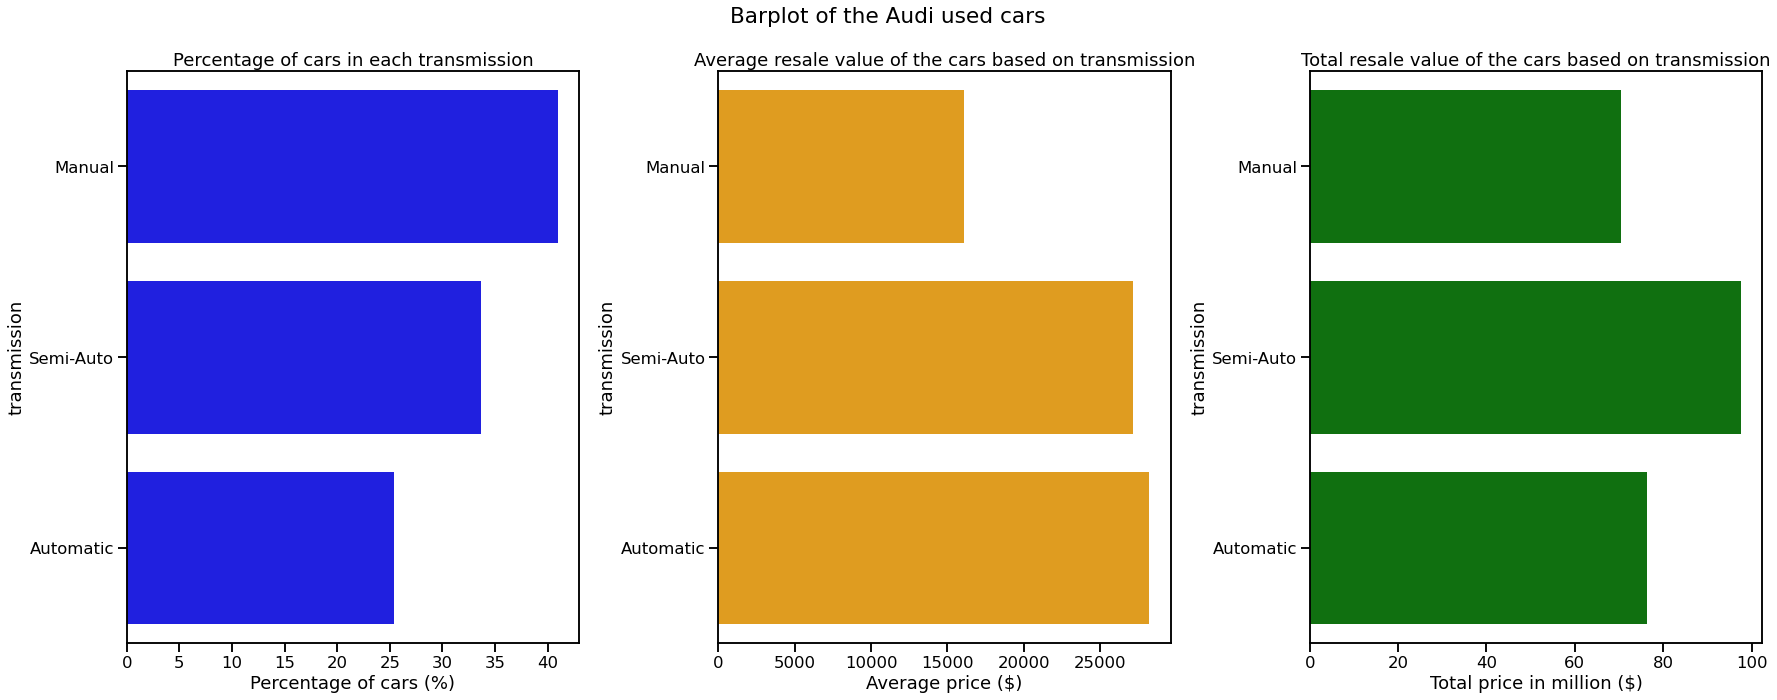

In [33]:
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average resale value of the cars based on transmission")
plt.xlabel("Average price ($)")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total resale value of the cars based on transmission")
plt.xlabel("Total price in million ($)")

plt.suptitle("Barplot of the Audi used cars")
plt.tight_layout()
plt.show()

**Data Aggregation [Based on Fuel Type]**

In [34]:
df_agg = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


In [35]:
# sorting the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# creating a new column for percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# removing the 'count' column from the dataframe
df_agg = df_agg.drop('count', axis=1)

# converting the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# rounding off the dataframe to two decimal points
df_agg = df_agg.round(2)

display(df_agg.head())

,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


**Barplot of the Audi used cars: Percentage of cars, Average and Total selling price of cars based on fuel type**

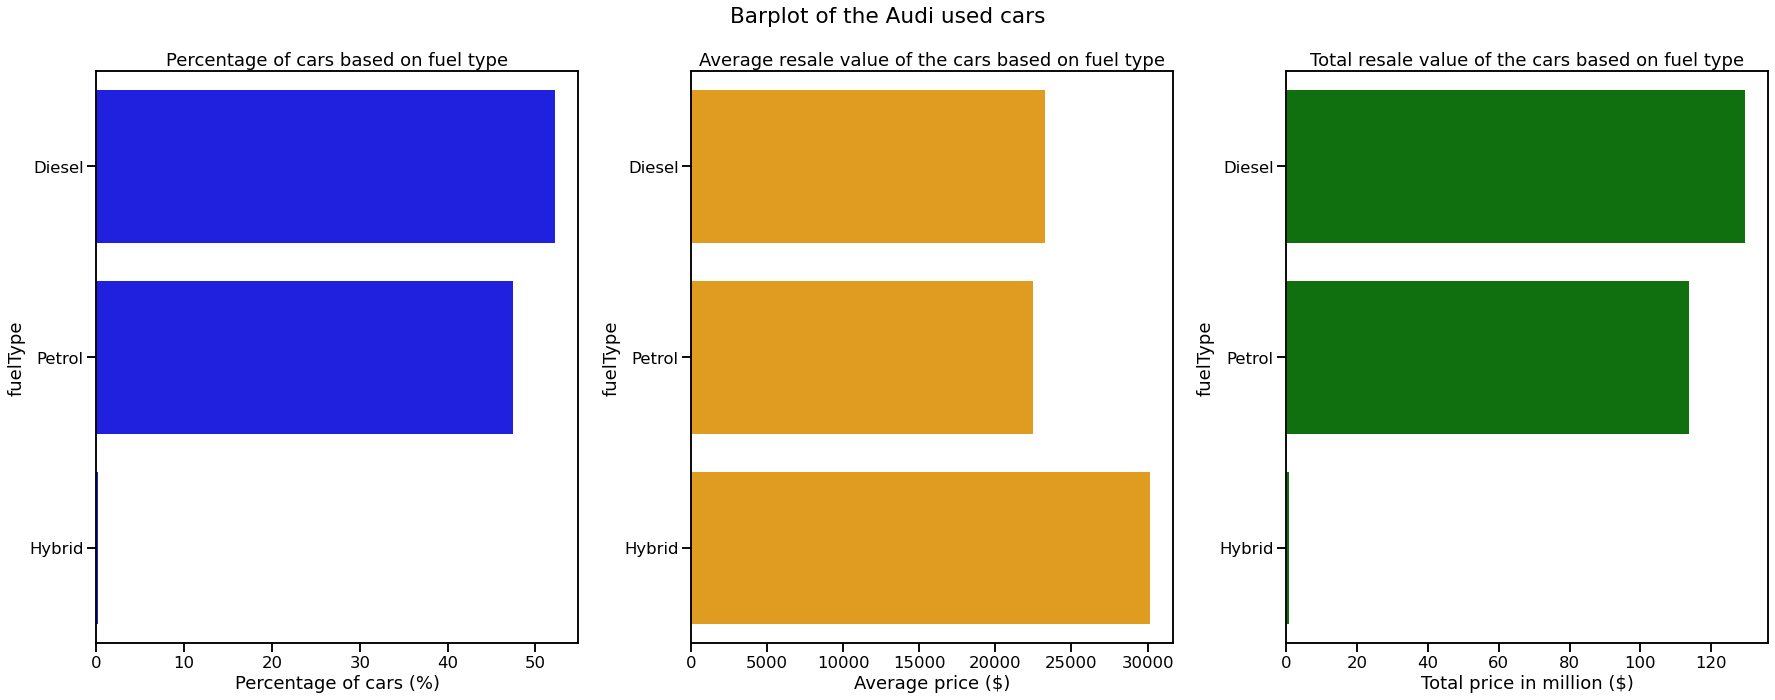

In [36]:
plt.figure(figsize=(25,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars based on fuel type")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average resale value of the cars based on fuel type")
plt.xlabel("Average price ($)")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total resale value of the cars based on fuel type")
plt.xlabel("Total price in million ($)")

plt.suptitle("Barplot of the Audi used cars")
plt.tight_layout()
plt.show()

**Separating numeric features and target variable**

In [37]:
features = ['mileage','year','mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(10668, 4) (10668, 1)


**Splitting the dataset into the train set and the test set**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 4) (2134, 4) (8534, 1) (2134, 1)


**Performing Linear Regression**

In [39]:
model = LinearRegression()
model = model.fit(X_train, y_train)

**Predicting the 'Price' from the test set**

In [40]:
y_pred = model.predict(X_test)

In [41]:
print(y_pred)

[[ 8404.61685932]
 [25242.08315391]
 [29769.42539605]
 ...
 [15223.19196191]
 [25409.82306727]
 [12240.88891797]]


In [42]:
print(y_test)

       price
10442   9990
2907   22382
7388   28990
3016   30777
7890   14950
...      ...
8606   31450
8977   12900
3673   16750
1034   21996
6867    9547

[2134 rows x 1 columns]


**Prediction Error**

In [43]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

5719.124258888187


For the test set, RMSE is found to be very high for the Linear Regression model